In [4]:
%pylab inline
from skimage import data, color, exposure, io
import os
import urllib
# import urllib2

Populating the interactive namespace from numpy and matplotlib


# Obrazy

Powyżej zaimportowano kilka klas z biblioteki *scikit-image*:

  * data - przykładowe zdjęcia i metody do wczytywania danych
  * color - metody dotyczące przestrzeni barw
  * exposure - metody do obliczania i manipulacji histogramu
  * io - metody wyjścia/wejścia

Dokładny opis biblioteki znajdziesz tutaj: http://scikit-image.org/docs/stable/api/api.html

W bibliotece jest o wiele więcej klas, ale dzisiaj użyjemy tylko te wspomniane wyżej.

Oprócz *scikit-image* importujemy biblioteki *urllib* 1 i 2 do ściągania danych z internetu i standardowo *numpy* oraz *matplotlib*. Spójrzmy najpierw jakie metody mamy w klasie *data*?

In [7]:
dir("data")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

Wczytaj obraz o nazwie "astronaut" i wyświetl go metodą *pyplot.imshow*.

Sprawdź jakiego typu danych jest zmienna zawierająca obraz i jakiego kształtu jest ta macierz.

Narysuj osobno czerwoną, zieloną i niebieską składową obrazu.

uint8
(512, 512, 3)


Text(0.5,1,'skladova B')

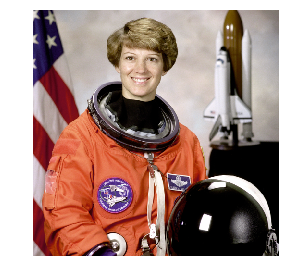

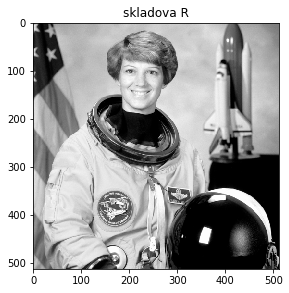

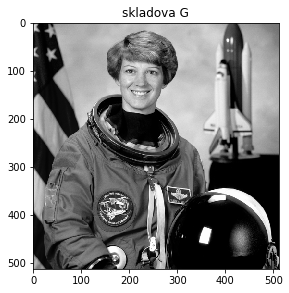

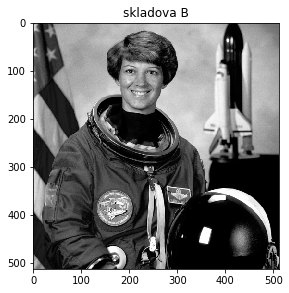

In [11]:
i = data.astronaut()
io.imshow(i)
_=axis("off")

print(i.dtype)
print(i.shape)

figure()
io.imshow(i[:,:,0])
title("skladova R")

figure()
io.imshow(i[:,:,1])
title("skladova G")

figure()
io.imshow(i[:,:,2])
title("skladova B")

## Wczytywanie z internetu

Wczytaj teraz obraz PNG z internetu i narysuj go.

Można użyć ten URL: http://www.pja.edu.pl/templates/pjwstk/images/logo-lg-md.png

Użyj metody *urllib2.urlopen* żeby otworzyć strumień i przekaż go do funkcji *pyplot.imread*.

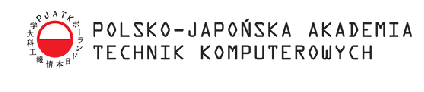

In [49]:
s = urllib.request.urlopen('http://www.pja.edu.pl/templates/pjwstk/images/logo-lg-md.png')

i = imread(s)
s.close()

io.imshow(i)
_=axis("off") #оси по бокам

Swpróbujmy obraz https://upload.wikimedia.org/wikipedia/commons/a/a0/Sunflower_as_gif_websafe.gif

Pyplot niestety nie obsługuje obrazów GIF, więc w tym przypadku trzeba ściągnąć i zapisać plik na dysku. Do tego można użyć metody *urllib.urlretrieve*, a potem można obraz wczytać metodą *data.load* z biblioteki *scikit-image*.

Metoda *data.load* nie wczytuje plików z bieżącego katalogu, więc należy użyć metody *os.getcwd()* żeby wskazać katalog w którym się znajdujemy.

(297, 250, 3)


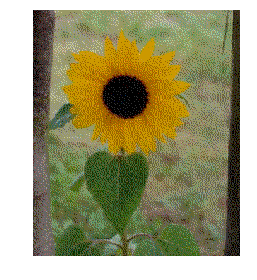

In [15]:
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/a/a0/Sunflower_as_gif_websafe.gif','img1.gif')

# !wget https://upload.wikimedia.org/wikipedia/commons/a/a0/Sunflower_as_gif_websafe.gif

i = data.load(os.getcwd()+'/img1.gif')

print(i.shape)

io.imshow(i)
_=axis("off") #оси по бокам

## Przestrzenie barw

Zmień przetrzeń barw z RGB na HSV i narysuj składwe H, S i V obrazu.

Text(0.5,1,'skladova V')

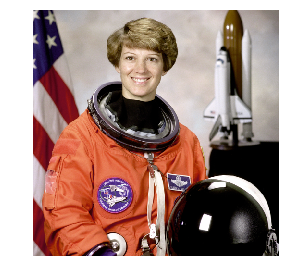

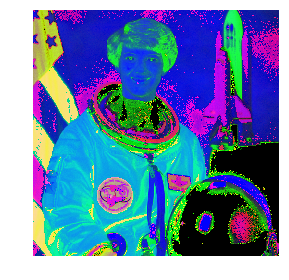

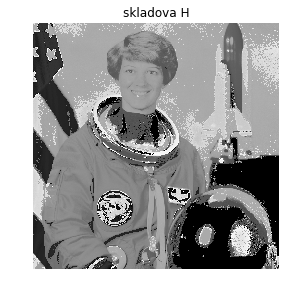

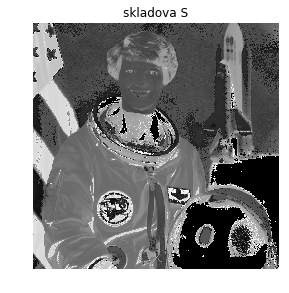

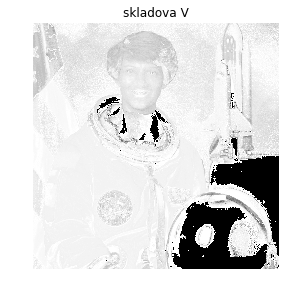

In [20]:
i = data.astronaut()
io.imshow(i)
_=axis('off')

figure()
i = color.rgb2hsv(i)
io.imshow(i)
_=axis('off')

figure()
i = color.rgb2hsv(i)
io.imshow(i[:,:,0])
_=axis('off')
title("skladova H")

figure()
i = color.rgb2hsv(i)
io.imshow(i[:,:,1])
_=axis('off')
title("skladova S")

figure()
i = color.rgb2hsv(i)
io.imshow(i[:,:,2])
_=axis('off')
title("skladova V")



Zrób to samo ale dla przestrzeni LAB.

/usr/local/lib/python3.4/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


Text(0.5,1,'skladova B')

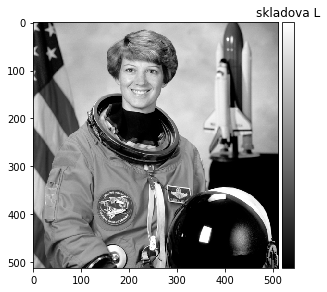

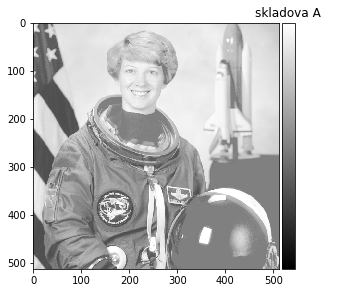

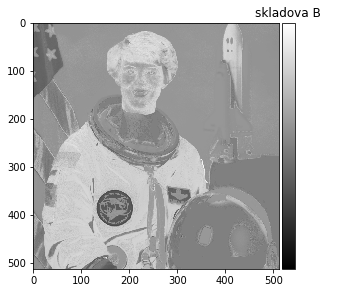

In [53]:
i = data.astronaut()
# io.imshow(i)
# _=axis('off')

# figure()
# i = color.rgb2lab(i)
# io.imshow(i)
# _=axis('off')

figure()
i = color.rgb2lab(i)
io.imshow(i[:,:,0], cmap='gray')
_=axis('off')
title("skladova L")

figure()
i = color.rgb2lab(i)
io.imshow(i[:,:,1], cmap='gray')
_=axis('off')
title("skladova A")

figure()
i = color.rgb2lab(i)
io.imshow(i[:,:,2], cmap='gray')
_=axis('off')
title("skladova B")


In [54]:
color.rgb2lab?


Narysuj obraz astronautki w odcieniach szerości i zbliż zdjęcie do zakresu 250-350 w osi X i Y (użwając metod *xlim* i *ylim*).

Sprawdź działanie argumentu *interpolation* w metodzie *imshow* (sprawdź ustawienie 'none').

1.0
0.0


(150, 50)

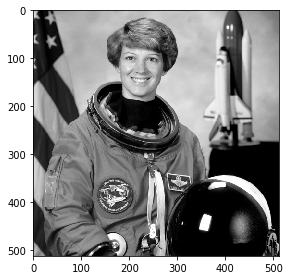

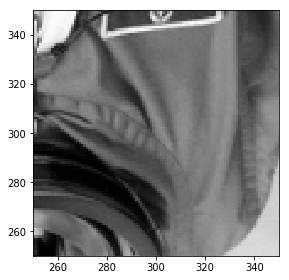

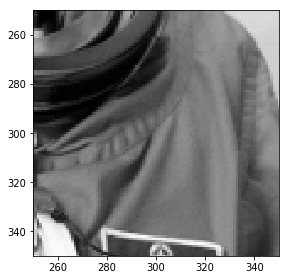

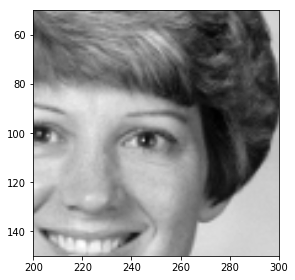

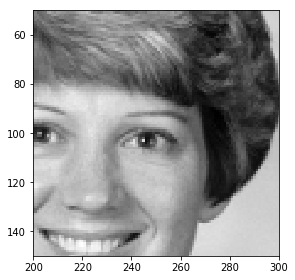

In [32]:
i = data.astronaut()

i = color.rgb2gray(i)

print(i.max())
print(i.min())

io.imshow(i)

figure()
io.imshow(i)
xlim(250, 350)
ylim(250, 350)

figure()
io.imshow(i)
xlim(250, 350)
ylim(350, 250)


figure()
io.imshow(i, interpolation='bilinear')
xlim(200, 300)
ylim(150, 50)

figure()
io.imshow(i, interpolation='none')
xlim(200, 300)
ylim(150, 50)

## Histogramy

Policz histogram obrazu Lena w odcieniach szarości uzywając 3 metod:

  * biblioteką scikit-image - metoda *exposure.histogram*
  * biblioteką numpy - metoda *numpy.histogram*
  * biblioteką matplotlib - metoda *pyplot.hist*
  
Narsyuj przy użyciu wykresu *pyplot.bar* albo *pyplot.plot*.

(array([ 53882.,  21661.,  14603.,  16961.,  29507.,  29995.,  28105.,
         39001.,  21531.,   6898.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

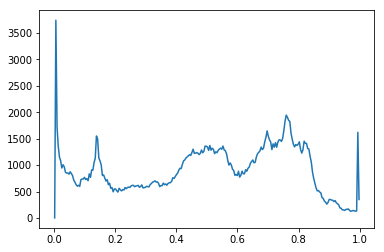

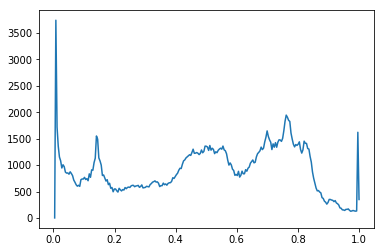

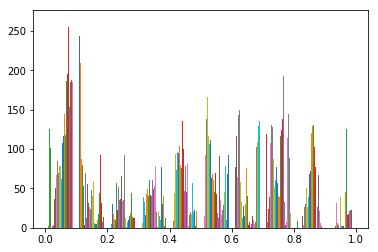

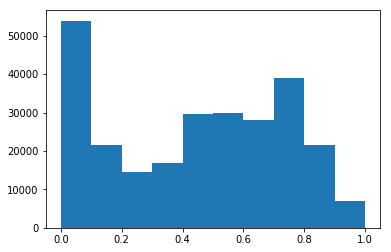

In [42]:
i = data.astronaut()
i = color.rgb2gray(i)

#exposure
h,x = exposure.histogram(i)
h[0] = 0 #для упрощения

plot(x,h)
figure()

#np
h,x = np.histogram(i, bins=256)
h[0] = 0 #трюк

plot(x[1:],h)
figure()

#pyplot
pyplot.hist(i)
pyplot.hist(i.flatten()) # 3d -> 2d


## Steganografia

Wczytaj obraz stego.bmp i wyświetl. Czy jest coś nie tak z tym obrazem?

Narysuj jego histogram.

Odczytaj 3 ostatnie bity każdego piksela z danego obrazu i zrób z tego inny obraz.

Metoda ukrywania informacji w obrazach (lub innych zbiorach danych gdzie niewielkie perturbacje wartości nie zmieniają jego treści) znana jest właśnie pod nazwą *steganografia*. Więcej informacji znajdziesz tutaj:

https://en.wikipedia.org/wiki/Steganography

0.029665629069
1.0


/usr/local/lib/python3.4/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


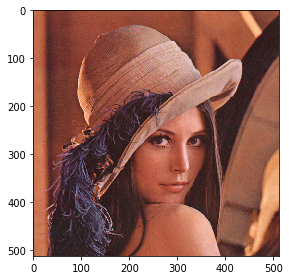

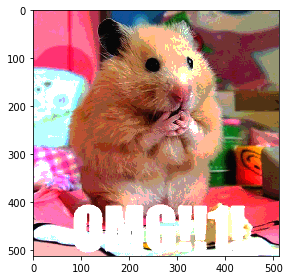

In [48]:
i = data.load(os.getcwd()+'/stego.bmp')

io.imshow(i)

i.dtype

m = 7

i = np.bitwise_and(i,m)
# i = 255/7 * i
i = exposure.equalize_hist(i)

print(i.min())
print(i.max())

figure()
io.imshow(i, cmap=cm.gray)

# Praca domowa

Zrób własny przykład steganografii. Ukryj jakąś informacje (nie musi to być zdjęcie) w jakimś innym pliku tak żeby nie zaburzyć jego 

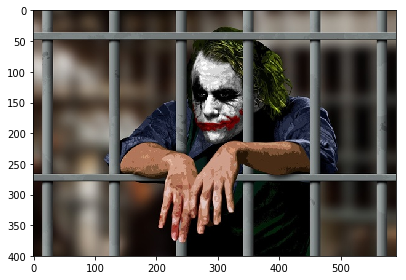

In [333]:
# The image
i = data.load(os.getcwd()+'/joker.bmp')
io.imshow(i)

In [301]:
# some bin-dec converting

num = i[0][0][1]
print(num)

b_num = "{0:b}".format(num);
print( b_num )

b_num = bin(num)
print( b_num )

# Function
def bin_dec(bin_num):
    return int(bin_num, 2)
def dec_bin(num):
    return bin(num).zfill(8)

print( dec_bin(num) )
# and back the dec value
print( bin_dec(dec_bin(num)) )

46
101110
101110
00101110
46


In [345]:

st = 'Hear some text 2 decode!'
print( len(st))
print(st)
print()

def string2bits(s=''):
    return [bin(ord(x)).zfill(8) for x in s]

def bits2string(b=None):
    return ''.join([chr(int(x, 2)) for x in b])

st_bits = string2bits(st)
the_st = bits2string(_bits)

print( len(st_bits))
print(st_bits)
print(the_st)
print()

# def str2bits(s):
#     result = []
#     for c in s:
#         bits = bin(ord(c))[2:]
#         bits = '00000000'[len(bits):] + bits
#         result.extend([bits])
#     return result
# print( len( str2bits(st) ))
# print(str2bits(st))
print(dec_bin(178))
print( bits2string([dec_bin(178)]) )

24
Hear some text 2 decode!

24
['01001000', '01100101', '01100001', '01110010', '00100000', '01110011', '01101111', '01101101', '01100101', '00100000', '01110100', '01100101', '01111000', '01110100', '00100000', '00110010', '00100000', '01100100', '01100101', '01100011', '01101111', '01100100', '01100101', '00100001']
Hear some text 2 decode!

10110010
²


In [348]:
# array figuring out
print(i.shape)
# print(i)
print(i[0])
print()

# one-by-one 
# we will take a char-byte and hide it in pixel-rgb-bytes (in last 2-3 bits)
# char = { b1 b2 b3 b4 b5 b6 b7 b8 }
# R: xx xx xx b1 b2
# G: xx xx x b3 b4 b5
# B: xx xx x b6 b7 b7

chr_iter = 0

# E N C O D I N G

print('Lets hide the msg')
running = True
print('...')
for y in i:
    if(not running):
        break
#     print(y)
    
    for x in y:
        if(not running):
            break
#         print(x)
        
#         if(chr_iter >= 1 ):
        if(chr_iter >= len(st) ):
        
            # end char
            the_bit = dec_bin(178)
#             the_ch = '&'
#             the_bit = string2bits(the_ch)[0]
            print(' '+str(chr_iter)+" chars")
            running = False
        else:
            the_ch = st[ chr_iter ]
            the_bit = string2bits(the_ch)[0]
        
        r = dec_bin( x[0] )
        g = dec_bin( x[1] )
        b = dec_bin( x[2] )
#         print(r)
#         print(g)
#         print(b)
        
#         print()
#         print(the_bit)
#         print()
        
        r = r[:6] + the_bit[:2]
        g = g[:5] + the_bit[2:5]
        b = b[:5] + the_bit[5:8]
#         print(r)
#         print(g)
#         print(b)
        
        x[0] = bin_dec(r)
        x[1] = bin_dec(g)
        x[2] = bin_dec(b)
        
        chr_iter = chr_iter +1
print("The msg has been hiden")

(400, 590, 3)
[[ 61  41  32]
 [ 65  44  37]
 [ 61  52  41]
 ..., 
 [ 98  82  67]
 [100  84  69]
 [101  85  70]]

Lets hide the msg
...
 24 chars
The msg has been hiden


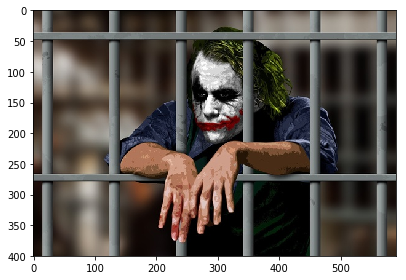

In [326]:
# New image with hiden msg
io.imshow(i)

In [340]:
# D E C O D I N G
it = 0
flag = True
result = []
print('Lets decode the msg')
for y in i:
    if(not flag):
        break
        
    for x in y:
        if(not flag):
            break
        
        if(it >= 50 ):
            flag = False
            break
            
        r = dec_bin( x[0] )
        g = dec_bin( x[1] )
        b = dec_bin( x[2] )
#         print(r)
#         print(g)
#         print(b)
#         print()
        the_char = ( r[6:] + g[5:] +  b[5:] ) 

        if( the_char == dec_bin(178) ):
            print("stop-char")
            flag = False
            break
            
        result.append( the_char )
        it = it +1
print(len(result))
print(result)


Lets decode the msg
stop-char
24
['01001000', '01100101', '01100001', '01110010', '00100000', '01110011', '01101111', '01101101', '01100101', '00100000', '01110100', '01100101', '01111000', '01110100', '00100000', '00110010', '00100000', '01100100', '01100101', '01100011', '01101111', '01100100', '01100101', '00100001']


In [337]:
# R E S U L T S 
the_st = bits2string(result)
print(the_st)

Hear some text 2 decode!
